In [6]:
# TASK 1:MOVIE GENRE CLASSIFICATION

In [7]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import warnings

In [10]:
# READING THE DATASET
movieGenre_data= pd.read_csv("/test_data.txt", delimiter=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")
train_data = pd.read_csv("/train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data_solution  = pd.read_csv("/test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [11]:
# EXPLORATARY DATA ANALYSIS
movieGenre_data

,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [12]:
train_data

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
27225,27226,"""Real Women"" (1998)",comedy,"Born and brought in London, five friends are ..."
27226,27227,Message from the King (2016),thriller,After suddenly losing all contact with his yo...
27227,27228,Midnight Sun (1998),horror,Nick is a new Asst. Professor at MSU. To save...
27228,27229,Ale (2010),short,A short film exploring how locally brewed cra...


In [13]:
test_data_solution

,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
22494,22495,Szerencsés flótás (1943),comedy,Mail author for translation. A kastely lakoin...
22495,22496,Treasures (Trezoros),documentary,A moving documentary that illuminates the liv...
22496,22497,Frank Yankovic: America's Polka King (2010),documentary,This film hosted by Myron Floren is a compreh...
22497,22498,The Knackery (2009),horror,"Set in the very near future, The Knackery is ..."


In [14]:
print(movieGenre_data.shape)
movieGenre_data.head(6)


(54200, 3)


,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [15]:
print(train_data.shape)
train_data.head(6)

(27230, 4)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [16]:
print(test_data_solution.shape)
test_data_solution.head(6)

(22499, 4)


,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
5,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...


In [17]:
movieGenre_data.duplicated().sum()
train_data.duplicated().sum()
test_data_solution.duplicated().sum()

0

In [18]:
movieGenre_data.isna().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [19]:
train_data.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [20]:
test_data_solution.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [21]:
movieGenre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54200 non-null  int64 
 1   GENRE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [22]:
movieGenre_data.describe()

,TITLE
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [23]:
movieGenre_data['GENRE'].value_counts()

 Edgar's Lunch (1998)                                                      1
 Relationship with Grannie (????)                                          1
 The Dummy (1995)                                                          1
 Moonlighting (1982)                                                       1
 Beggar on Horseback (1925)                                                1
                                                                          ..
 An Everlasting Piece (2000)                                               1
 The Last Steamship: The Search for the SS City of Medicine Hat (2010)     1
 "Ombre Ma Fi" (2017)                                                      1
 Tapioca (2009)                                                            1
 Curitiba Zero Grau (2010)                                                 1
Name: GENRE, Length: 54200, dtype: int64

In [24]:
 # CONCATENATING TWO DATASETS (train_data AND test_data_solution)
DF = pd.concat((train_data ,test_data_solution))
DF.columns = ["id no" ,"Title","Genre","Description"]
DF.head()

,id no,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [25]:
DF.shape

(49729, 4)

In [26]:
DF["Genre"].value_counts()

 drama           12455
 documentary     12049
 comedy           6787
 short            4730
 horror           2008
 thriller         1476
 action           1219
 western           918
 reality-tv        814
 family            721
 adventure         704
 music             693
 romance           601
 sci-fi            597
 adult             553
 animation         477
 crime             436
 sport             396
 talk-show         345
 fantasy           299
 mystery           294
 musical           225
 biography         222
 history           212
 game-show         183
 news              180
 war               135
Name: Genre, dtype: int64

In [27]:
# CREATING NEW COLUMN NAMED 'LENGTH'
# NEW COLUMN CONTAINS THE LENGTH (NUMBER OF CHARACTERS)
DF['length']=DF['Description'].apply(len)
DF.head()

,id no,Title,Genre,Description,length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


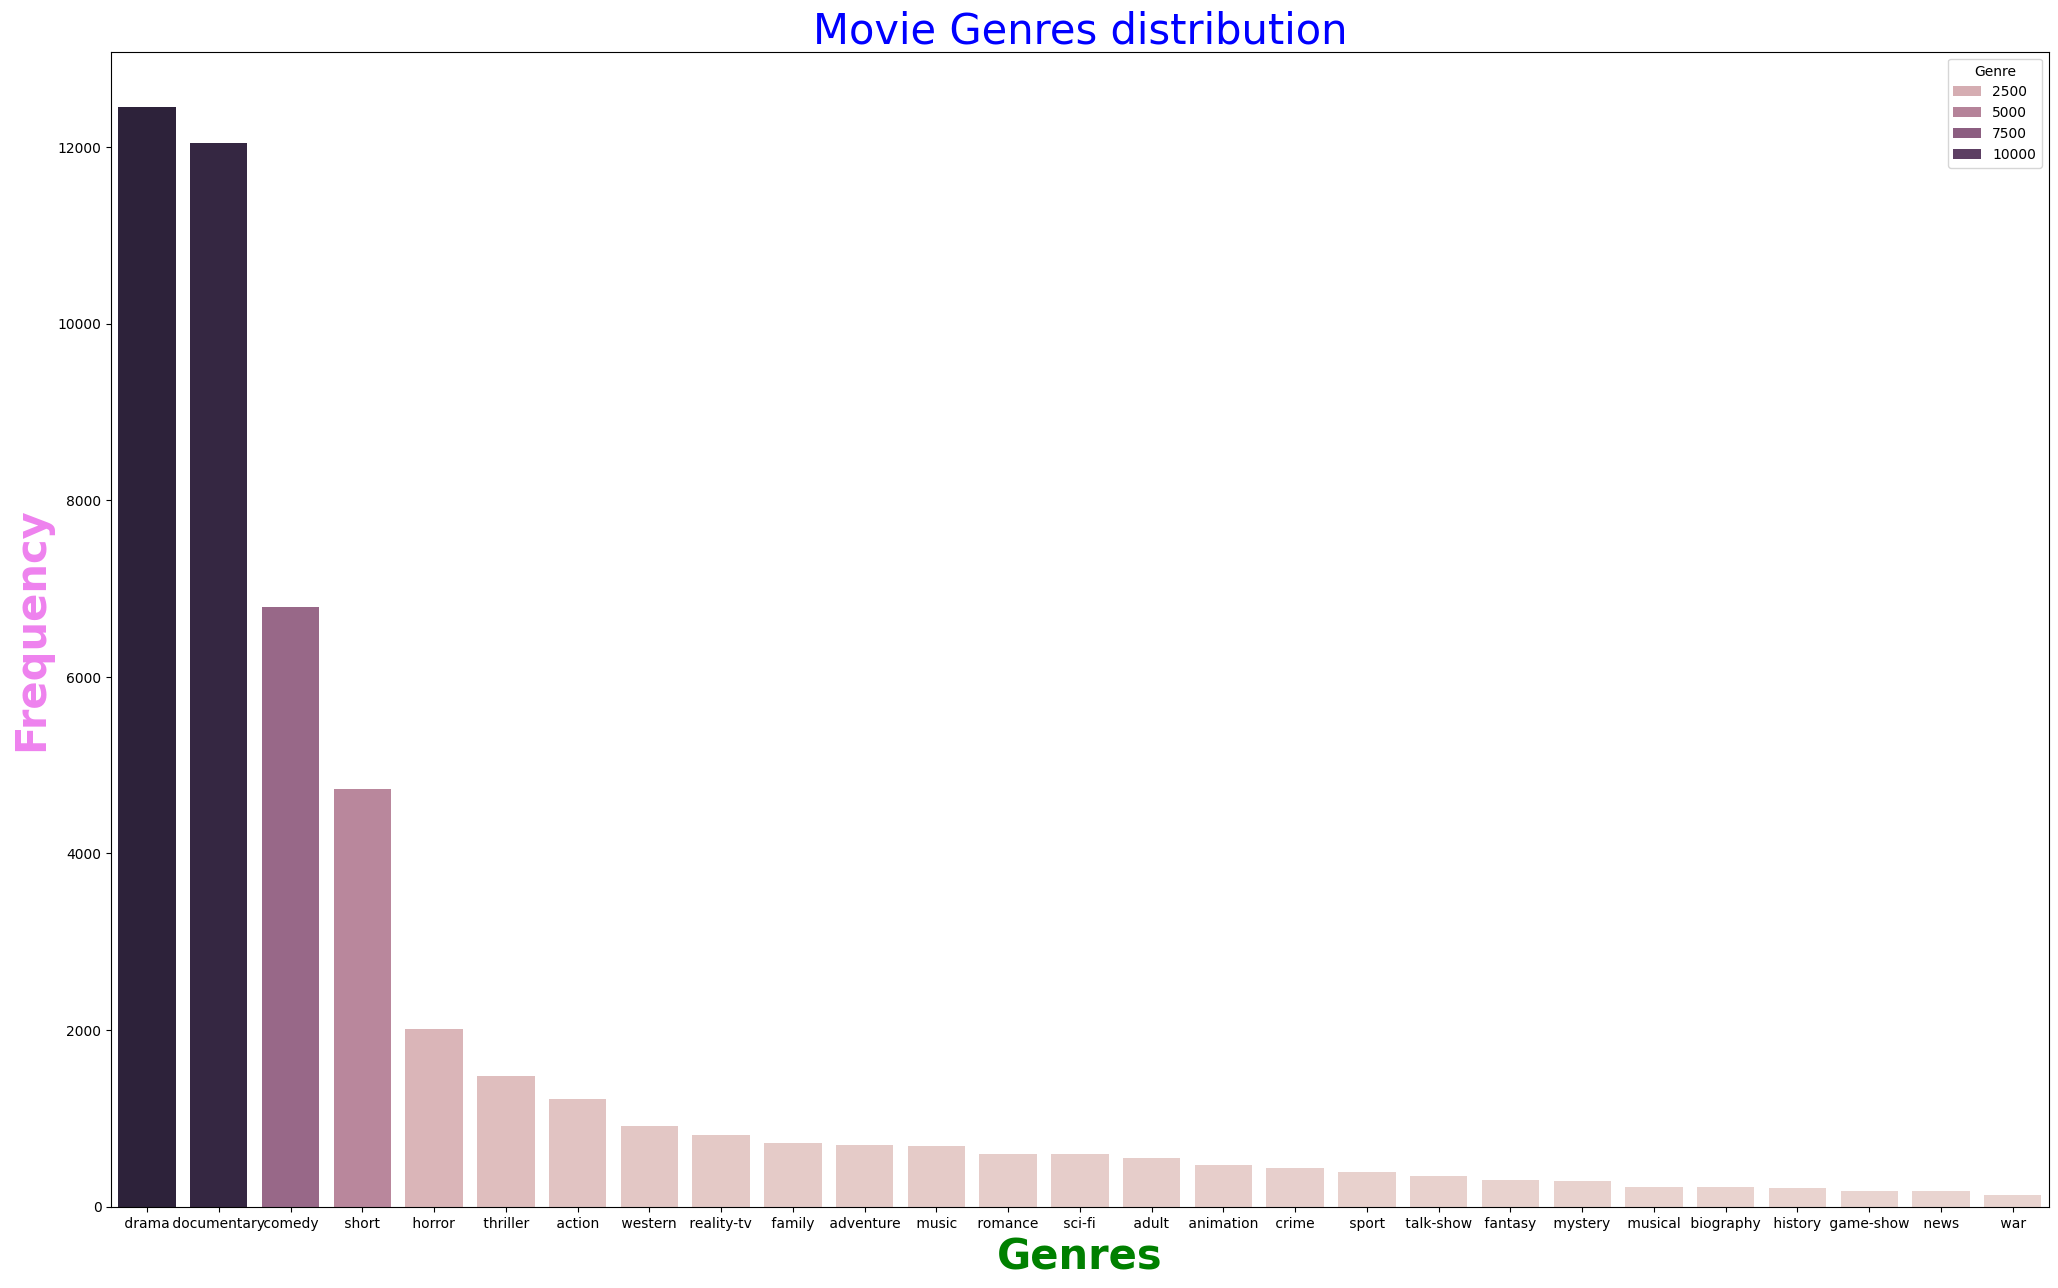

In [28]:
# DATA VISUALIZATION
genres = DF['Genre'].value_counts()
plt.figure(figsize=(25,15))
sns.barplot(x=genres.index, y=genres,hue=genres)
plt.title("Movie Genres distribution", fontsize=30, c='Blue')
plt.xlabel("Genres", fontsize=30,fontweight='bold',c='Green')
plt.ylabel("Frequency", fontsize=30,fontweight='bold',c='Violet')
plt.show()

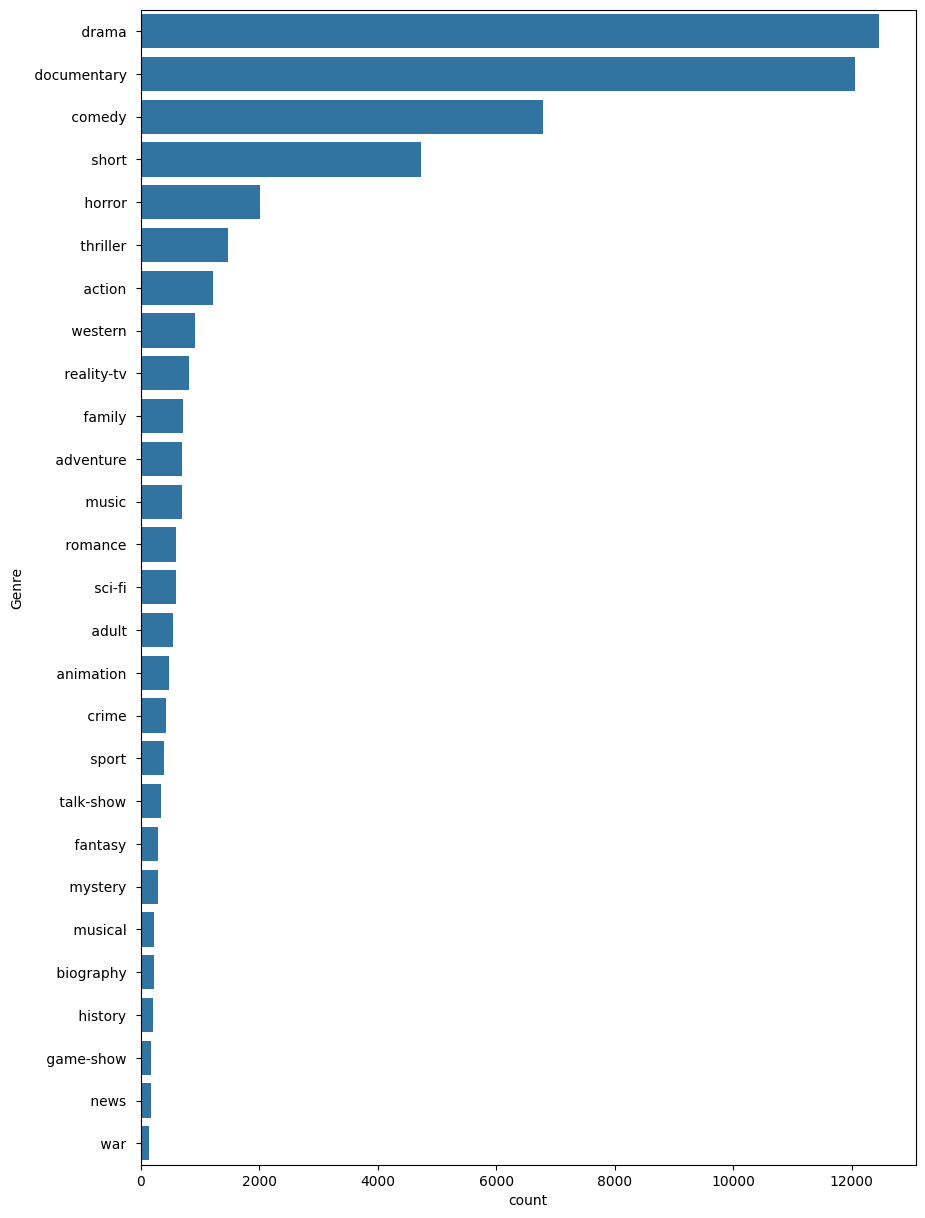

In [29]:
plt.figure(figsize=(10,15))
sns.countplot(data=DF, y="Genre", order= DF["Genre"].value_counts().index)
plt.show()

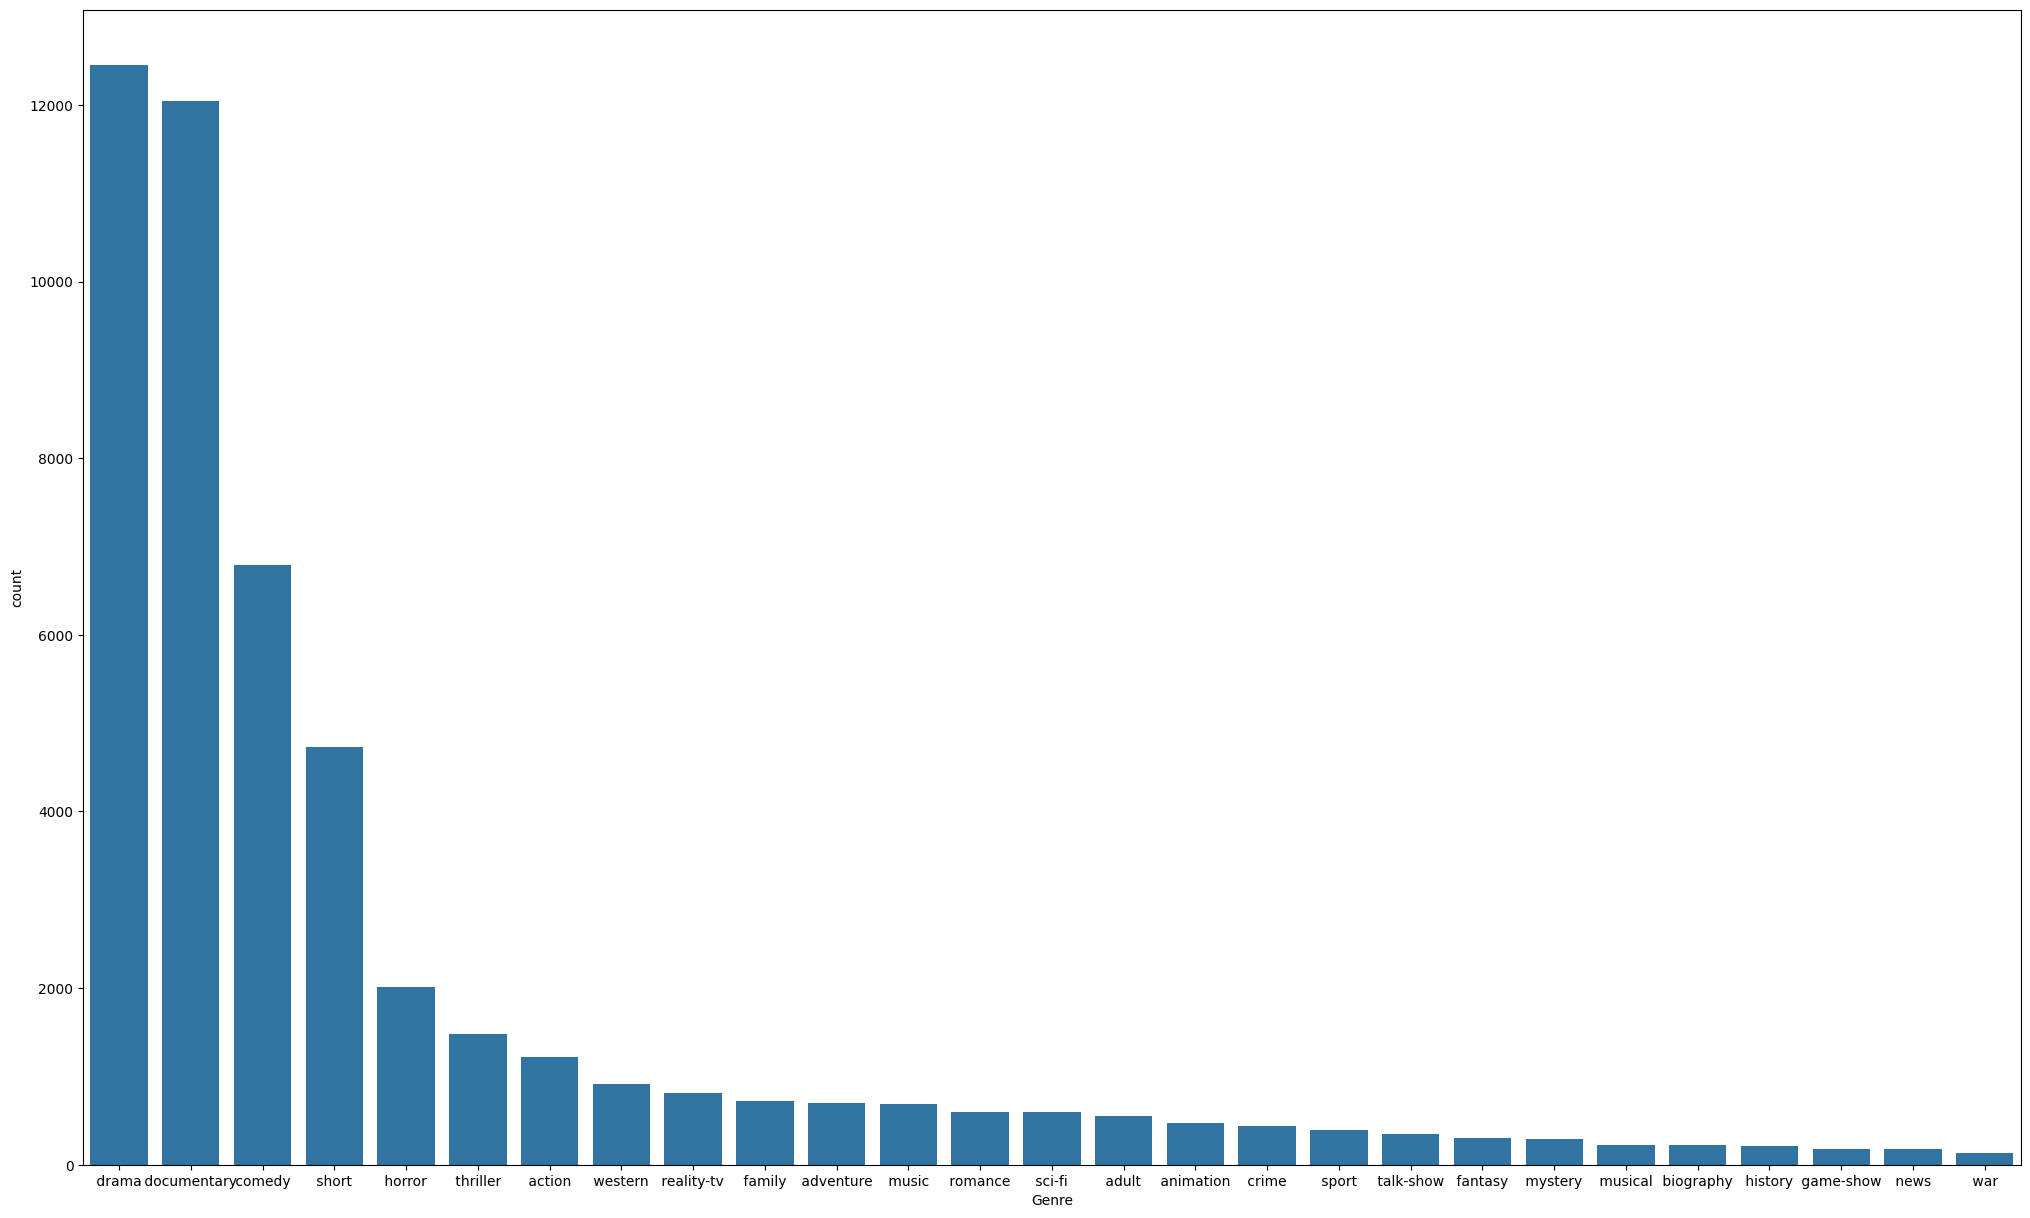

In [30]:
plt.figure(figsize=(25,15))
sns.countplot(data=DF, x="Genre", order= DF["Genre"].value_counts().index)
plt.show()

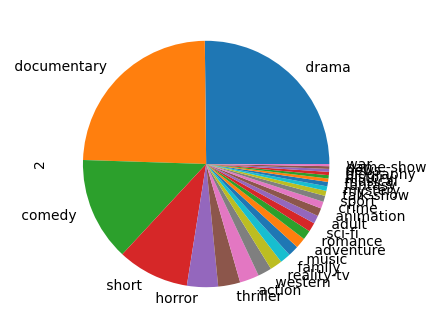

In [31]:
test_data_solution[2].value_counts().plot(kind='pie', figsize=(4,4));

In [32]:
# Importing CountVectorizer,TfidfVectorizer from scikit-learn
# Creating a CountVectorizer object
# Creating a TfidfVectorizer object with a maximum of 90 features
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=90)

In [33]:
print(movieGenre_data.head())

   TITLE                          GENRE  \
0      1          Edgar's Lunch (1998)    
1      2      La guerra de papá (1977)    
2      3   Off the Beaten Track (2010)    
3      4        Meu Amigo Hindu (2015)    
4      5             Er nu zhai (1955)    

                                         DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  


In [34]:
print(movieGenre_data.columns)

Index(['TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')


In [35]:
X_train = tfidf.fit_transform(movieGenre_data["DESCRIPTION"]).toarray()

In [36]:
# Importing MinMaxScaler from scikit-learn
# Creating a MinMaxScaler object
# Scaling the data (X_data) to fit within the specified range (typically between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)

In [37]:
X_train.shape

(54200, 90)

In [38]:
y_train = movieGenre_data.GENRE
y_train

0                   Edgar's Lunch (1998) 
1               La guerra de papá (1977) 
2            Off the Beaten Track (2010) 
3                 Meu Amigo Hindu (2015) 
4                      Er nu zhai (1955) 
                       ...               
54195     "Tales of Light & Dark" (2013) 
54196        Der letzte Mohikaner (1965) 
54197                Oliver Twink (2007) 
54198                  Slipstream (1973) 
54199          Curitiba Zero Grau (2010) 
Name: GENRE, Length: 54200, dtype: object

In [39]:
#Data Preprocessing
vectorizer = TfidfVectorizer()

In [40]:
vectorizer.get_stop_words()

In [41]:
plot =movieGenre_data['DESCRIPTION'][0:2] # get first plot
type(plot)

tokens = vectorizer.fit_transform(plot)

In [42]:
vectorizer.get_feature_names_out()

array(['1964', 'across', 'after', 'against', 'and', 'anger', 'another',
       'apartment', 'are', 'as', 'authoritarian', 'becomes', 'been',
       'belonging', 'birth', 'brane', 'brother', 'brothers', 'but', 'buy',
       'car', 'causing', 'child', 'children', 'civil', 'class',
       'committing', 'confirm', 'conspiracy', 'convenience', 'cristina',
       'dad', 'day', 'despot', 'disobedient', 'don', 'eight',
       'especially', 'event', 'every', 'existence', 'family', 'father',
       'feels', 'few', 'finding', 'for', 'girlfriend', 'gone', 'has',
       'have', 'he', 'her', 'his', 'house', 'housemaid', 'ideas', 'in',
       'is', 'job', 'juan', 'life', 'lost', 'loves', 'many', 'march',
       'members', 'middle', 'mind', 'minutes', 'months', 'more', 'mother',
       'much', 'nanny', 'naughty', 'no', 'occurs', 'of', 'old', 'older',
       'one', 'out', 'pablo', 'passed', 'position', 'prank', 'prince',
       'privileged', 'quick', 'quico', 'quite', 'resigned', 'rest',
       'result

In [43]:
print(vectorizer.vocabulary_)

{'brane': 15, 'loves': 63, 'his': 53, 'life': 61, 'car': 20, 'apartment': 7, 'job': 59, 'but': 18, 'especially': 37, 'girlfriend': 47, 'vespa': 122, 'one': 81, 'day': 32, 'while': 126, 'showering': 99, 'runs': 97, 'out': 82, 'of': 78, 'shampoo': 98, 'across': 1, 'the': 112, 'street': 109, 'to': 116, 'convenience': 29, 'store': 107, 'buy': 19, 'some': 104, 'more': 71, 'quick': 89, 'trip': 119, 'no': 76, 'than': 110, 'few': 44, 'minutes': 69, 'when': 125, 'he': 51, 'returns': 96, 'is': 58, 'gone': 48, 'and': 4, 'every': 39, 'trace': 118, 'her': 52, 'existence': 40, 'has': 49, 'been': 12, 'wiped': 128, 'becomes': 11, 'tortured': 117, 'as': 9, 'strange': 108, 'event': 38, 'after': 2, 'another': 6, 'occurs': 77, 'confirm': 27, 'in': 57, 'mind': 68, 'that': 111, 'conspiracy': 28, 'working': 131, 'against': 3, 'finding': 45, 'spain': 105, 'march': 65, '1964': 0, 'quico': 90, 'very': 121, 'naughty': 75, 'child': 22, 'three': 114, 'belonging': 13, 'wealthy': 124, 'middle': 67, 'class': 25, 'fam

In [44]:
import nltk

In [45]:
# Let's download the stopwords available in ntlk
# nltk.download('stopwords')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
stop_words = nltk.corpus.stopwords.words('english')

In [47]:
# Let's see the stopwords vailable in nltk.corpus
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [48]:
# Let's see how the filtered plot looks like
print("Before cleaning\n-------------------")
print(plot[1])

Before cleaning
-------------------
 Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of "prince" of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housemaid. The rest of the family members are two much older brothers, his resigned mother and a retrograde father of authoritarian ideas. But many years have passed, and the civil war that won the despot Don Pablo is simply for their children "Dad's war".


In [49]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string

def clean_plot_summary(plot_summary):
    # Convert to lowercase
    plot_summary = plot_summary.lower()
    # Remove punctuation
    plot_summary = ''.join([char for char in plot_summary if char not in string.punctuation])
    # Remove stop words
    plot_summary = ' '.join([word for word in plot_summary.split() if word not in ENGLISH_STOP_WORDS])
    return plot_summary

# Example
print("\nAfter cleaning\n-------------------")
clean_plot = clean_plot_summary(plot[1])
print(clean_plot)



After cleaning
-------------------
spain march 1964 quico naughty child belonging wealthy middleclass family cristinas birth feels lost privileged position prince house months old sister brother juan years old quite disobedient spend time committing prank prank causing resulting anger mother nanny old housemaid rest family members older brothers resigned mother retrograde father authoritarian ideas years passed civil war won despot don pablo simply children dads war


In [50]:
from nltk.corpus import stopwords
import re

def clean_plot(plot):
    # Convert to lowercase
    plot = plot.lower()
    # Remove numbers, symbols, and anything except alphabets
    plot = re.sub(r'[^a-zA-Z\s]+', '', plot).strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    plot = ' '.join([word for word in plot.split() if word.lower() not in stop_words])
    # Return cleaned plot
    return plot


In [51]:
movieGenre_data['Clean Plot'] = movieGenre_data['DESCRIPTION'].apply(clean_plot)
movieGenre_data.head()

,TITLE,GENRE,DESCRIPTION,Clean Plot
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",lr brane loves life car apartment job especial...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [52]:
# TF-IDF vectorizer
# Creating a TfidfVectorizer object
vectorizer = TfidfVectorizer()
# Transforming the 'Clean Plot' column of the 'movieGenre_data' DataFrame
# and storing the result in X_train
X_train = vectorizer.fit_transform(movieGenre_data['Clean Plot'])
# Displaying the shape of the transformed data
X_train.shape
# Extracting the 'GENRE' column from 'movieGenre_data' and storing it in y_train
y_train = movieGenre_data['GENRE']
print(y_train.shape)

(54200,)


In [53]:
print(y_train)

0                   Edgar's Lunch (1998) 
1               La guerra de papá (1977) 
2            Off the Beaten Track (2010) 
3                 Meu Amigo Hindu (2015) 
4                      Er nu zhai (1955) 
                       ...               
54195     "Tales of Light & Dark" (2013) 
54196        Der letzte Mohikaner (1965) 
54197                Oliver Twink (2007) 
54198                  Slipstream (1973) 
54199          Curitiba Zero Grau (2010) 
Name: GENRE, Length: 54200, dtype: object
